## Project Runner

### I. Import packages

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

import torch
import torch.nn as nn

""" 
9.3% of the population in the United States have diabetes , 28%
The cost of misclassification is high
"""

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', None)

seed = 12345

### II. Analyze Data

In [188]:
#read in clean data
csv_filename = 'dataset/clean_diabetic_dataset.csv'
csv_filename_2  = 'dataset/clean_diabetic_dataset_2nd.csv'
df = pd.read_csv(csv_filename_2)
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

In [189]:
#visualize
# def plot_count(colName,xLabel,title):
#     # Count the number of occurrences for each unique value in colName
#     value_counts = df[colName].value_counts()
    
#     # Create a bar graph using matplotlib
#     plt.bar(value_counts.index,value_counts.values)
    
#     # Set labels and title for the graph
#     plt.xlabel(xLabel)
#     plt.ylabel('Count')
#     plt.title(title)

#     # Display the graph
#     plt.show()
    

<Axes: ylabel='Frequency'>

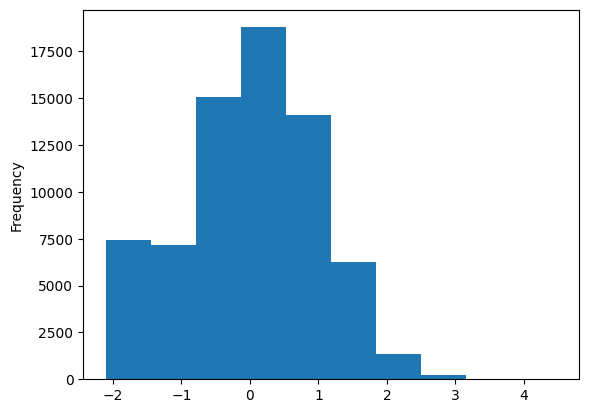

In [190]:
df.num_lab_procedures.plot(kind = 'hist')

In [191]:
# sns.displot(df.time_in_hospital)

In [192]:
# sns.heatmap(df.corr())

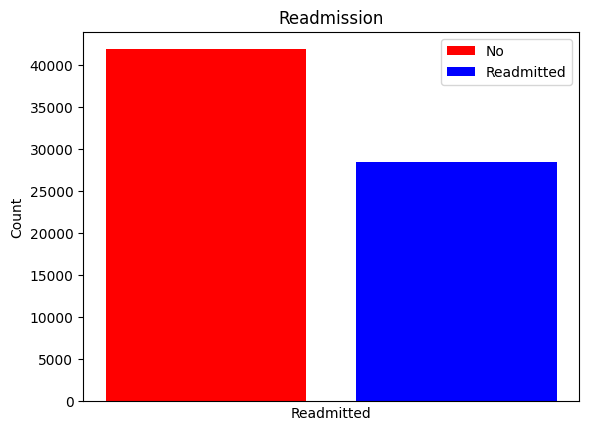

In [193]:
## READMISSION

# Count the occurrences for each unique value
unique_values, counts = np.unique(df['readmitted'], return_counts=True)
x_labels = ['No', 'Readmitted']
colors = ['red', 'blue', 'green']

bars = plt.bar(x_labels, counts,color=colors,label=x_labels)
plt.xticks([])
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Readmission')
plt.legend()
plt.show()

In [194]:
# Sample data
# categories = ['Category 1', 'Category 2', 'Category 3']
# group_names = ['Group 1', 'Group 2', 'Group 3']
# counts = np.array([[10, 15, 8],
#                    [12, 9, 6],
#                    [18, 7, 11]])

# # Determine the width of each bar and the positions of the groups
# bar_width = 0.2
# group_positions = np.arange(len(group_names))

# # Plot the bars for each category
# for i, category in enumerate(categories):
#     bar_positions = group_positions + (i * bar_width)
#     plt.bar(bar_positions, counts[i], width=bar_width, label=category)

# # Set the x-axis tick positions and labels
# plt.xticks(group_positions + bar_width * (len(categories) - 1) / 2, group_names)

# plt.ylabel('Count')
# plt.legend()
# plt.show()


In [195]:
# Racial Distributions
# category_counts = df['race'].value_counts()
# proportions = category_counts / len(df)
# labels = ['Caucasian' ,'AfricanAmerican' ,'Other', 'Asian', 'Hispanic']
# explode = (0, 0, 0, 0,0)  # To highlight a slice, you can use the explode parameter

# # Plot the pie chart
# plt.pie(proportions, explode=explode, labels=labels, autopct='%1.1f%%')

# # Add a title
# plt.title('Racial Distribution')

# # Show the plot
# plt.show()



In [196]:
# Sample data
# x = [1, 2, 3, 4, 5]
# y1 = [10, 15, 7, 12, 9]
# y2 = [8, 11, 6, 14, 5]

# # Plot the lines
# plt.plot(x, y1, label='Line 1')
# plt.plot(x, y2, label='Line 2')

# # Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Multiple Line Graph')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


### III. Trainning

In [197]:
y = df["readmitted"]
X = df.drop("readmitted",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True, random_state=seed)




#### K Nearest Neighbors

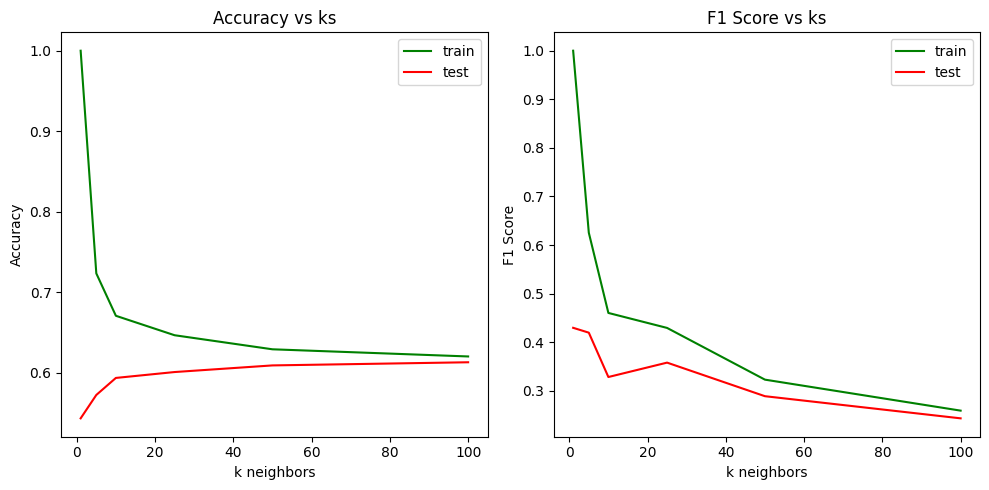

In [198]:
## KNeighborClassifier
ks=[1, 5, 10, 25, 50, 100]

knn_train_acc = []
knn_test_acc = []

knn_train_f1 = []
knn_test_f1 = []

for i in range(len(ks)):
    k = ks[i]
    kNN = KNeighborsClassifier(k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_train)
    y_test_pred = kNN.predict(X_test)
    
    knn_train_acc.append(accuracy_score(y_pred, y_train))
    knn_test_acc.append(accuracy_score(y_test_pred, y_test))
    
    knn_train_f1.append(f1_score(y_pred, y_train))
    knn_test_f1.append(f1_score(y_test_pred, y_test))
   
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(ks, knn_train_acc, color="green", label="train")
axes[0].plot(ks, knn_test_acc, color="red", label="test")
axes[0].set_xlabel("k neighbors")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy vs ks")
axes[0].legend()

axes[1].plot(ks, knn_train_f1, color="green", label="train")
axes[1].plot(ks, knn_test_f1, color="red", label="test")
axes[1].set_xlabel("k neighbors")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score vs ks")
axes[1].legend()
plt.tight_layout()
plt.show()


In [199]:
# Select k = 50 for best fit for kNN models
kNN = KNeighborsClassifier(25)
kNN.fit(X_train, y_train)
kNN_y_train_pred = kNN.predict(X_train)
start_time = time.time()
kNN_y_test_pred = kNN.predict(X_test)
pred_time = time.time() - start_time

# Use these values for final evaluation
kNN_acc_train = accuracy_score(kNN_y_train_pred, y_train)
kNN_acc_test = accuracy_score(kNN_y_test_pred, y_test)
kNN_f1 = f1_score(y_test_pred, y_test)
kNN_confusion_matrix = confusion_matrix(kNN_y_test_pred, y_test)
kNN_classification_report = classification_report(kNN_y_test_pred, y_test)


print("------K Neighbors Classifier------")
print("Training accuracy:", kNN_acc_train)
print("Test accuracy:", kNN_acc_test)
print("Prediction time: %.4f sec" % pred_time)
print("F1 score:", kNN_f1)
print("Confusion matrix:\n", kNN_confusion_matrix)
print("Classification Report:\n", kNN_classification_report)

------K Neighbors Classifier------
Training accuracy: 0.6466673764906303
Test accuracy: 0.6009652920718291
Prediction time: 0.6730 sec
F1 score: 0.24323198667221987
Confusion matrix:
 [[6900 4131]
 [1491 1567]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71     11031
           1       0.28      0.51      0.36      3058

    accuracy                           0.60     14089
   macro avg       0.55      0.57      0.53     14089
weighted avg       0.70      0.60      0.63     14089



In [200]:
# Learning curve of kNN Stats
train_sizes = [int(0.5 * X.shape[0]), int(0.6 * X.shape[0]), int(0.7 * X.shape[0]), int(0.8 * X.shape[0])]
kNN_train_sizes, kNN_train_scores, kNN_test_scores = learning_curve(kNN, X, y, random_state=seed, shuffle=True, train_sizes=train_sizes)
kNN_avg_train_scores = []
kNN_avg_test_scores = []

for train_size, train_score, test_score in zip(
  kNN_train_sizes, kNN_train_scores, kNN_test_scores
):
  print(f"Train size: {train_size}")
  print(f"Average training accuracy: {train_score.mean():.2f}")
  print(f"Average test accuracy: {test_score.mean():.2f}")
  kNN_avg_train_scores.append(train_score.mean())
  kNN_avg_test_scores.append(test_score.mean())
  

Train size: 35220
Average training accuracy: 0.65
Average test accuracy: 0.58
Train size: 42264
Average training accuracy: 0.65
Average test accuracy: 0.58
Train size: 49308
Average training accuracy: 0.65
Average test accuracy: 0.58
Train size: 56352
Average training accuracy: 0.65
Average test accuracy: 0.58


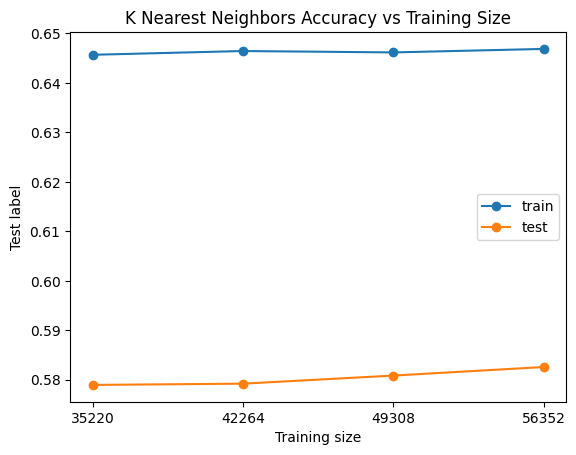

In [201]:
# Learning curve of kNN plot
plt.plot(kNN_train_sizes, kNN_avg_train_scores, label="train", marker="o")
plt.plot(kNN_train_sizes, kNN_avg_test_scores,  label="test", marker="o")
plt.xticks(kNN_train_sizes)
plt.xlabel("Training size")
plt.ylabel("Test label")
plt.title("K Nearest Neighbors Accuracy vs Training Size")
plt.legend()
plt.show()

In [202]:
## KNeighborsClassifier

# Some keyword arguments for making nice looking plots.
# Feel free to change grid_resolution to a higher number -- this results in better looking plots,
# but may result in your code running more slowly.
# plot_kwargs = {'cmap': 'viridis',
#                'response_method': 'predict',
#                'plot_method': 'pcolormesh',
#                'shading': 'auto',
#                'alpha': 0.5,
#                'grid_resolution': 100}

# figure, axes = plt.subplots(2, 2, figsize=(8, 8))

# X_train, X_test, y_train, y_test

# for i,k in enumerate([1,5,10,50]):
#     x =  i%2
#     y =  i//2 
#     knnClassifier = KNeighborsClassifier(n_neighbors = k)
#     knnClassifier.fit(X_train,y_train)
#     DecisionBoundaryDisplay.from_estimator(knnClassifier,
#                                 X_train,ax = axes[x,y],**plot_kwargs)
#     le = LabelEncoder()
#     le.fit(y_train)
#     axes[x,y].scatter(X_train,
#                       y_train,
#         c = le.transform(y_train,cmap = 'viridis'))

#### Logistic Regression

In [203]:
# Initial training
lr = LogisticRegression(penalty = 'l1',solver = 'saga', fit_intercept = True, random_state=seed)
lr.fit(X_train, y_train)

print("------Logistic Regression------")
lr_train_pred = lr.predict(X_train)
start_time = time.time()
lr_test_pred = lr.predict(X_test)
pred_time = time.time() - start_time

lr_train_acc =  accuracy_score(y_train, lr_train_pred)
lr_test_acc =  accuracy_score(y_test, lr_test_pred)
lr_f1_score = f1_score(y_test, lr_test_pred)
lr_confusion_matrix = confusion_matrix(y_test, lr_test_pred)
lr_classification_report = classification_report(y_test, lr_test_pred)

print("Training accuracy:", lr_train_acc)
print("Test accuracy:", lr_test_acc)
print("Prediction time: %.4f sec"% pred_time)
print("F1 score:", lr_f1_score)
print("Confusion matrix:\n", lr_confusion_matrix)
print("Classification report:\n", lr_classification_report)

------Logistic Regression------
Training accuracy: 0.6151866837024418
Test accuracy: 0.6138831712683654
Prediction time: 0.0020 sec
F1 score: 0.2909280500521377
Confusion matrix:
 [[7533  858]
 [4582 1116]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.73      8391
           1       0.57      0.20      0.29      5698

    accuracy                           0.61     14089
   macro avg       0.59      0.55      0.51     14089
weighted avg       0.60      0.61      0.56     14089



In [204]:
# Generate hyperparams set
hyperparameter_dicts = [
    {'penalty': 'l1', 'random_state': seed, 'C': 1, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.1, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.01, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 1, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.1, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.01, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l1', 'random_state': seed, 'C': 1, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.1, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.01, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l1', 'random_state': seed, 'C': 1, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.1, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l1', 'random_state': seed, 'C': 0.01, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l2', 'random_state': seed, 'C': 1, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l2', 'random_state': seed, 'C': 0.1, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l2', 'random_state': seed, 'C': 0.01, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 100},
    {'penalty': 'l2', 'random_state': seed, 'C': 1, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l2', 'random_state': seed, 'C': 0.1, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 150},
    {'penalty': 'l2', 'random_state': seed, 'C': 0.01, 'solver': 'lbfgs', 'class_weight': 'balanced', 'max_iter': 150},
    ]

In [205]:
# Train model for each set of hyperparams
lr_train_acc = []
lr_test_acc = []

for hp_set in hyperparameter_dicts:
  lr = LogisticRegression(penalty=hp_set['penalty'], random_state=hp_set['random_state'], 
                          C=hp_set['C'], solver=hp_set['solver'], class_weight=hp_set['class_weight'],
                          max_iter=hp_set['max_iter'])
  lr.fit(X_train, y_train)
  train_pred = lr.predict(X_train)
  test_pred = lr.predict(X_test)

  lr_train_acc.append(accuracy_score(y_train, lr_train_pred))
  lr_test_acc.append(accuracy_score(y_test, lr_test_pred))
  


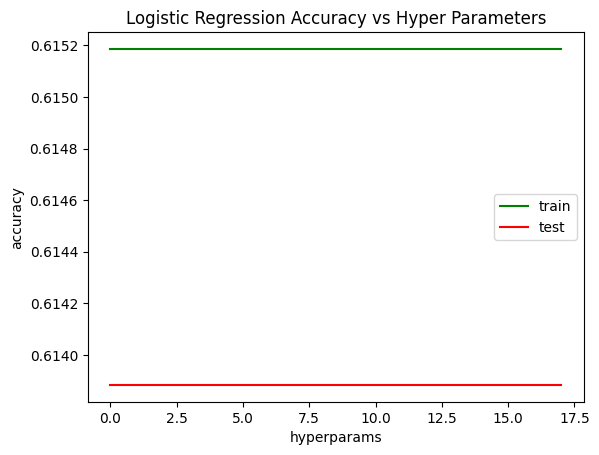

In [206]:
plt.plot(lr_train_acc, color="green", label="train")
plt.plot(lr_test_acc, color="red", label="test")
plt.xlabel("hyperparams")
plt.ylabel("accuracy")
plt.title("Logistic Regression Accuracy vs Hyper Parameters")
plt.legend()
plt.show()

In [207]:
lr = LogisticRegression(penalty = 'l1',solver = 'liblinear', C=0.1, fit_intercept = True, random_state=seed)
lr_train_sizes, lr_train_scores, lr_test_scores = learning_curve(lr, X, y, random_state=seed, shuffle=True, train_sizes=train_sizes)
lr_avg_train_scores = []
lr_avg_test_scores = []

for train_size, train_score, test_score in zip(
  lr_train_sizes, lr_train_scores, lr_test_scores
):
  print(f"Train size: {train_size}")
  print(f"Average training accuracy: {train_score.mean():.2f}")
  print(f"Average test accuracy: {test_score.mean():.2f}")
  lr_avg_train_scores.append(train_score.mean())
  lr_avg_test_scores.append(test_score.mean())


Train size: 35220
Average training accuracy: 0.62
Average test accuracy: 0.61
Train size: 42264
Average training accuracy: 0.62
Average test accuracy: 0.61
Train size: 49308
Average training accuracy: 0.62
Average test accuracy: 0.61
Train size: 56352
Average training accuracy: 0.62
Average test accuracy: 0.61


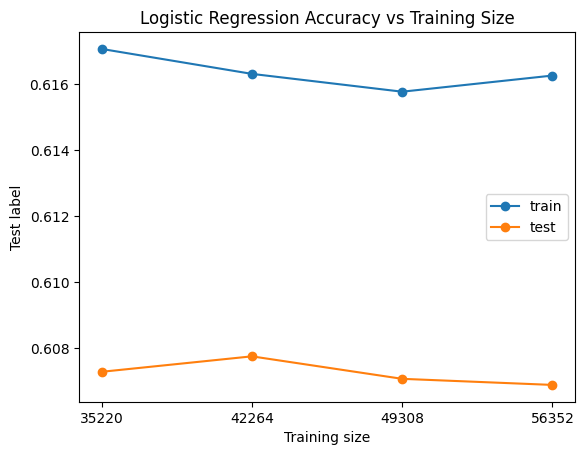

In [208]:
plt.plot(lr_train_sizes, lr_avg_train_scores, label="train", marker="o")
plt.plot(lr_train_sizes, lr_avg_test_scores,  label="test", marker="o")
plt.xticks(lr_train_sizes)
plt.xlabel("Training size")
plt.ylabel("Test label")
plt.title("Logistic Regression Accuracy vs Training Size")
plt.legend()
plt.show()

In [209]:
#neural network
torch.manual_seed(12345)

# Split the training and validation sets (70% training, 15% validation)
# X_train, X_test, y_train, y_test = 
# train_test_split(df.drop("readmitted",axis=1), test_size=0.15, random_state=12345)


# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=12345)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train)
# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# y_val_tensor = torch.tensor(y_val)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        return out

# hyperparameters
input_size = 30  # Number of features in the input
hidden_size = 60 # Number of units in the hidden layer
num_classes = 2  # Number of output classes
num_epochs = 100
learning_rate = 0.1

# Create an instance of the neural network
model = NeuralNet(input_size, hidden_size, num_classes)

# Print the model architecture
print(model)

# Initialize the loss function
criterion = nn.CrossEntropyLoss()

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor )
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)




print(f'Test Accuracy: {accuracy:.4f}')


KeyError: 1

### IV. Testing and Graph